<a href="https://colab.research.google.com/github/gouthammsamsnfhf/Hotel-Business-case-Study/blob/main/Hotel_Booking_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Loading the DataSet**

In [2]:
df= pd.read_csv("/content/drive/MyDrive/hotel_bookings 2.csv")

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


# **Exploring Data Analysis and Data Cleaning**

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
import datetime as dt
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [8]:
df.describe(include = object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print("-"*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
df = df[df['adr']<5000]

# **Data Analysis and Visualisation**

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


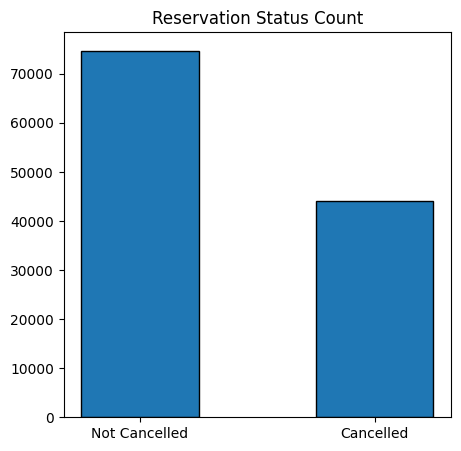

In [15]:
cancelled_percent = df['is_canceled'].value_counts(normalize = True)
print(cancelled_percent)

plt.figure(figsize=(5,5))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','Cancelled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.5)
plt.show()

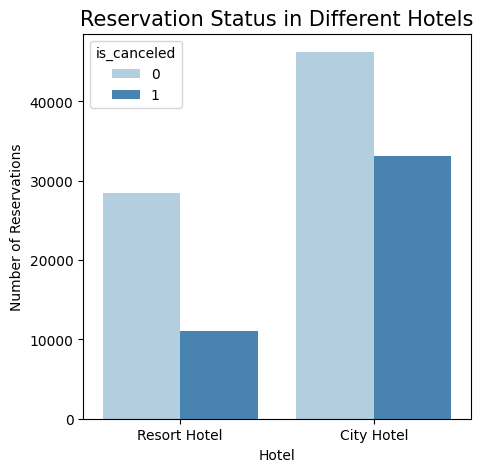

In [16]:
# Checking the cancellation rate depends on various Hotels
plt.figure(figsize=(5,5))
plt.title('Reservation Status in Different Hotels', size = 15)
axis1 = sns.countplot( x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

plt.show()

 **In compared to resort hotels city hotels have more bokkings, it is possible that resort hotels are more expensive than those in cities**

In [17]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

**From above result, we can say that around 28% of reservations are cancelled in Resort Hotel**

In [18]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

**From above result, we can say that around 41% of reservations are cancelled in City Hotel**

In [19]:
resort_hotel =  resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel =  city_hotel.groupby('reservation_status_date')[['adr']].mean()

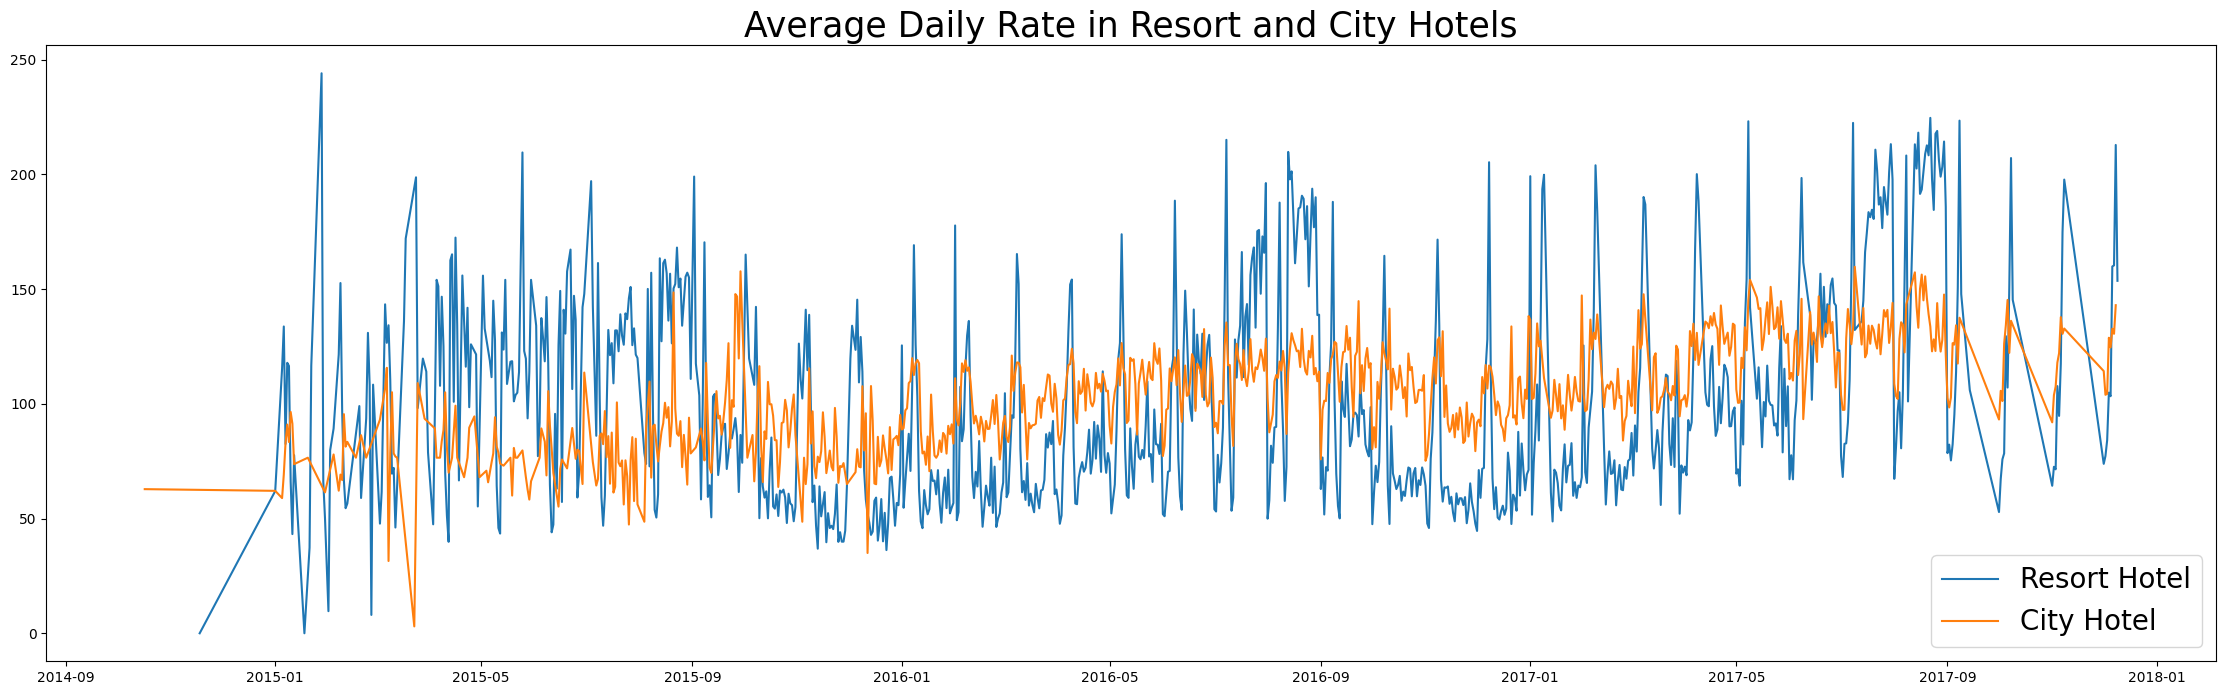

In [20]:
plt.figure(figsize=(28,8))
plt.title('Average Daily Rate in Resort and City Hotels', fontsize = 25)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = "Resort Hotel")
plt.plot(city_hotel.index, city_hotel['adr'], label = "City Hotel")
plt.legend(fontsize = 20)

**Above graph shows that city hotels prices are less compared to Resort hotels and also in Resort and City Hotels there is spike of amount on weekends and holidays**

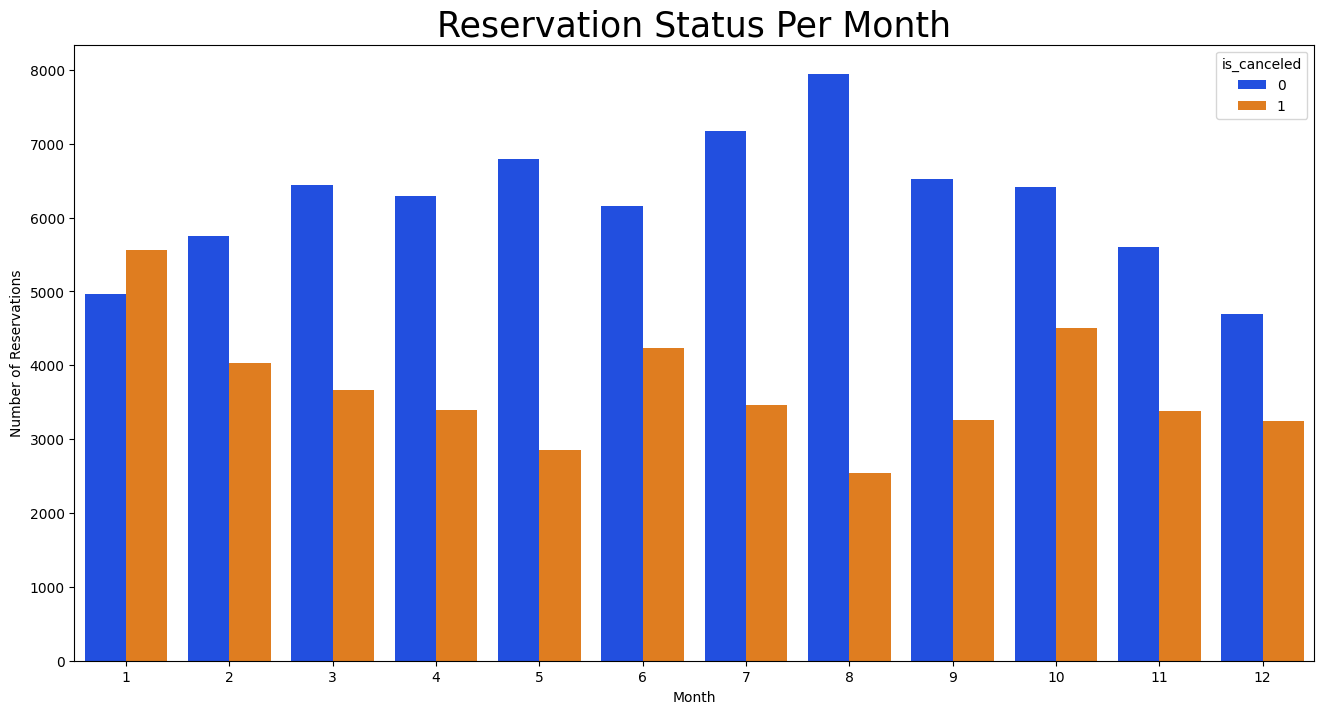

In [21]:
df['month'] =  df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot( x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
plt.title('Reservation Status Per Month', size = 25)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')

plt.show()


**We have Developed grouped bar graph to analyse the highest and lowest reservation as per reservation status date and it shows that reservations are cancelled rate is high in JAN month and low in Aug month**

In [22]:
df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().sort_values(by = ['adr'], ascending = False)

,adr
month,
1,532660.54
6,468827.36
3,419319.79
4,399361.20
2,399081.98
7,387597.85
10,384742.47
5,343229.69
9,340233.39


**The Above Stats proves that in JAN month there High ADR and we can say that because of high ADR hotels received high cancellation reservations and at same time we can observe AUG month has low ADR and there are low cancellation reservation as per graph above. This proves that when price gets higher there will high cancelation rate**

([<matplotlib.patches.Wedge at 0x7e8092bf23e0>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917596, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.35374990801472966, 0.48462459964344595, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.2087767

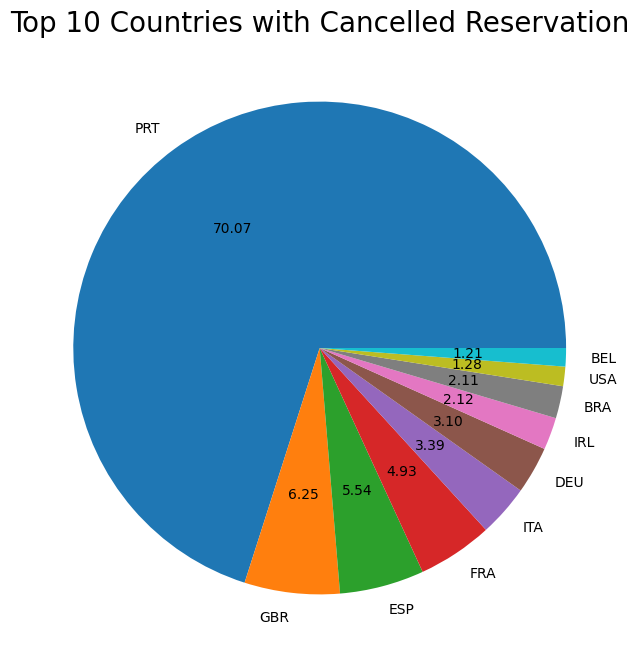

In [23]:
cancelled_data = df[df['is_canceled'] == 1]
top10_countries = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries with Cancelled Reservation', size = 20)
plt.pie(top10_countries, autopct = '%.2f', labels = top10_countries.index)

**From Above Pie Chart we can see that Portugal Country has Highest rate of cancellation which is arounf 70%**

In [29]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

# **We have clients coming for hotel reservations from online travel agency more than 47% as per above stats**

In [30]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

# #Clientswho are booking Reservations through Online TA and most probably same percentage of clients cancelling the reservation through same Online TA as we can see above i.e approx 46%

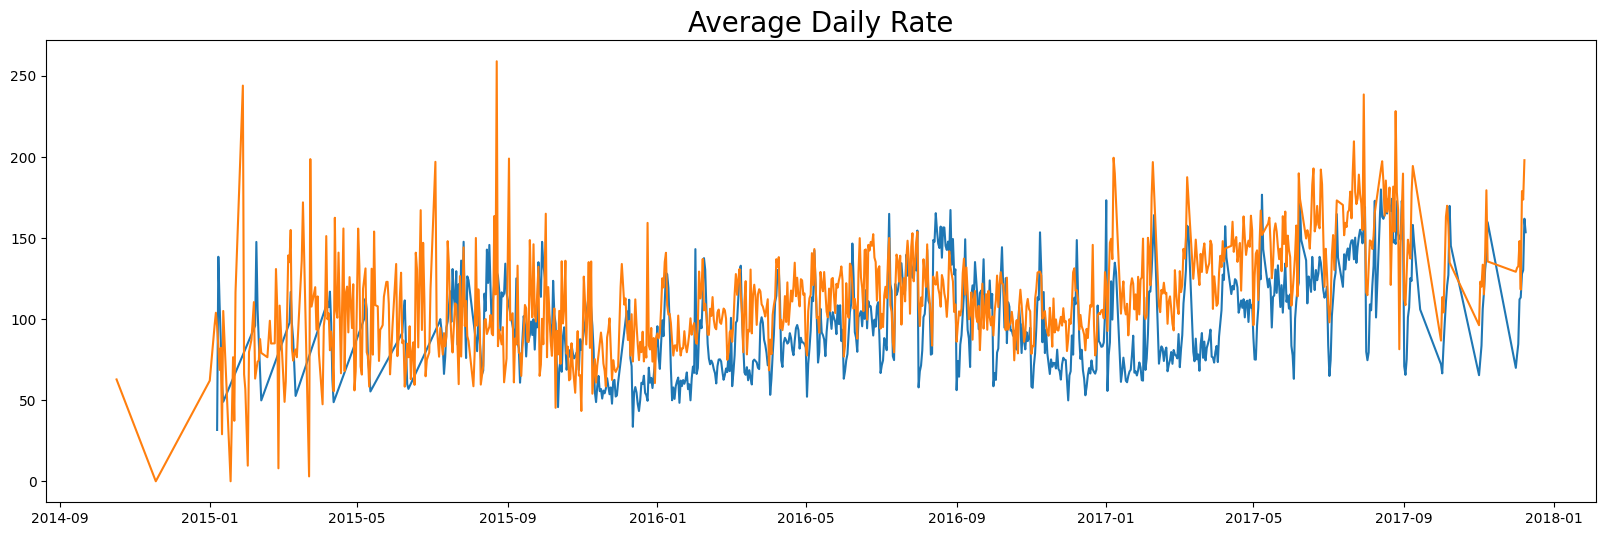

In [31]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace= True)
cancelled_data_adr.sort_values(by= 'reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace= True)
not_cancelled_data_adr.sort_values(by= 'reservation_status_date', inplace = True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate', size = 20)
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'], label = 'not cancelled' )
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'], label = 'cancelled' )

In [32]:
cancelled_data_adr = cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016') & (cancelled_data_adr['reservation_status_date']<'2017-09')]
not_cancelled_data_adr = not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date']>'2016') & (not_cancelled_data_adr['reservation_status_date']<'2017-09')]

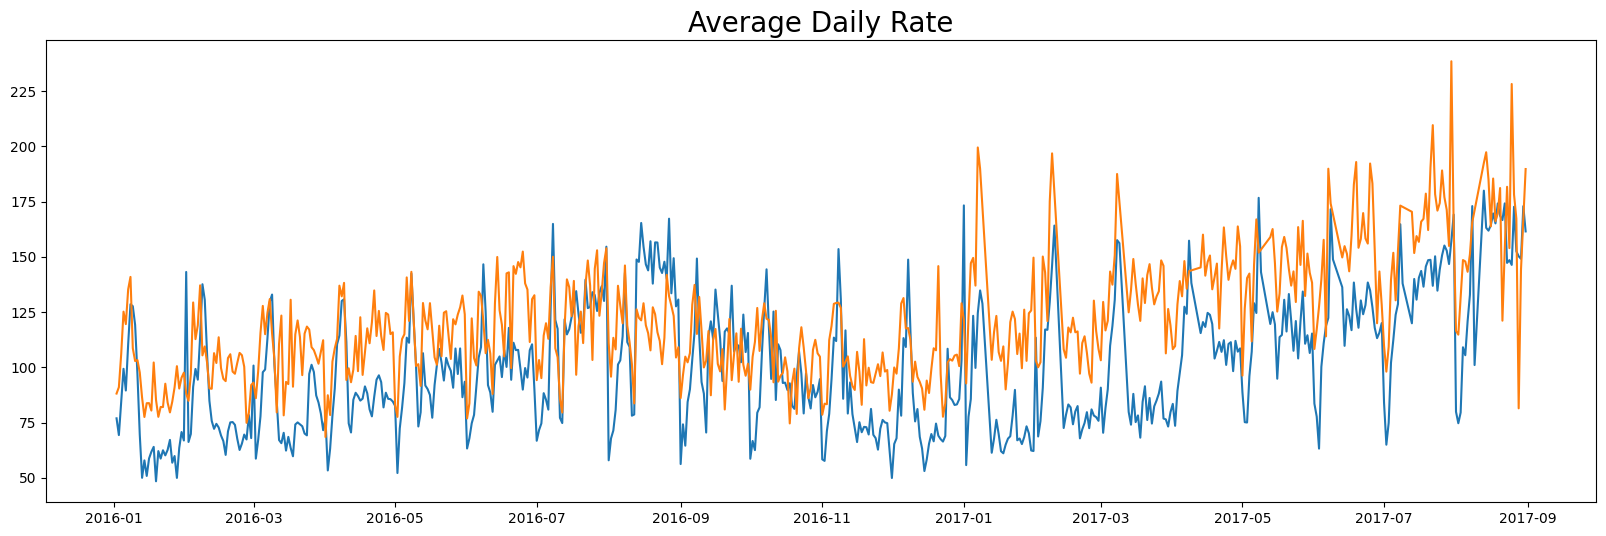

In [33]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate', size = 20)
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'], label = 'not cancelled' )
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'], label = 'cancelled' )

**As seen as Reservations are cancelled when Average daily rate is higher than when it is not cancelled. It clearly proves all the above analysis, that the higher price leads to higher cancellations.**

**Suggestions**
1. Cancellation Rates rise as the proces does. In order to prevent cancellations of reservations, hotesl could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers
2. As the ratio of cancellation and not cancellation of the resort hotels is higher in resort hotel than the city hotels, So the hotels should provide a resonable discount on the room prices on weekends or on holidays
3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as cancellation is the higher in this month.
4.They should also work on increasing the quality of their hotels and their services mainly in Portugal to reduce the cancellation.